# 《人工神经网络理论、设计及应用》代码实践-第六章 组合学习神经网络
<hr>

### 7.1 学习向量量化网络

#### 书中代码-Page152 7.1.4代码

In [1]:
#《人工神经网络理论、设计及应用》书中 Page152 7.1.4代码

# 导入所需的模块
import numpy as np  # 用于数值计算
import random  # 用于生成随机数
import matplotlib.pyplot as plt  # 用于绘图

# 定义LVQ网络类
class LVQnet:
    def __init__(self, n_inputs, n_outputs, groups, lr=0.4, epochs=1000):
        # 初始化参数
        self.epochs = epochs  # 最大迭代次数
        self.lr = lr  # 学习率

        # 确保groups的长度等于n_outputs
        assert len(groups) == n_outputs
        self.g = groups  # 每个类别的原型向量数量
        self.k = sum(groups)  # 总的原型向量数量
        self.w1 = np.random.rand(self.k, n_inputs) * 0.01  # 初始化第一层权重矩阵，形状为 (k, n_inputs)
        self.w2 = np.zeros((n_outputs, self.k))  # 初始化第二层权重矩阵，形状为 (n_outputs, k)
        
        # 初始化第二层权重矩阵，使得每个类别对应的原型向量位置为1
        cnt = 0
        for i in range(len(self.g)):
            for j in range(self.g[i]):
                self.w2[i, cnt] = 1  # 设置对应位置为1
                cnt += 1

    def fit(self, X, Y):
        N = len(X)  # 训练数据的样本数量
        for t in range(self.epochs):  # 迭代训练
            gamma = self.lr * (1 - t / self.epochs)  # 动态调整学习率
            idx = random.randint(0, N - 1)  # 随机选择一个样本
            x = X[idx]  # 获取选定的样本
            out = self.predict(x)  # 预测样本的输出
            y = Y[idx]  # 获取样本的真实标签
            error = np.sum(abs(out - y))  # 计算预测误差
            if error == 0:  # 如果预测正确
                self.w1[self.win] += gamma * self.v[self.win]  # 调整权重，使其更接近样本
            else:  # 如果预测错误
                self.w1[self.win] -= gamma * self.v[self.win]  # 调整权重，使其远离样本

    def predict(self, x):
        x = np.tile(x, (self.k, 1))  # 将输入样本复制k次，形状变为 (k, n_inputs)
        v = x - self.w1  # 计算输入样本与每个原型向量的差值
        self.v = v  # 保存差值矩阵
        distance = np.sum(v ** 2, axis=1).reshape(-1)  # 计算每个原型向量与输入样本的距离
        win = np.argmin(distance)  # 找到距离最近的原型向量的索引
        self.win = win  # 保存最近的原型向量的索引
        out = np.zeros((self.k, 1))  # 初始化输出向量
        out[win][0] = 1  # 将最近的原型向量对应的输出位置设为1
        out = self.w2.dot(out).reshape(-1)  # 通过第二层权重矩阵转换输出
        return out  # 返回最终的预测结果

# 数据准备
X = np.array([
    [-6, 0],
    [-4, 2],
    [-2, -2],
    [0, 1],
    [0, 2],
    [0, -2],
    [0, 1],
    [2, 2],
    [4, -2],
    [6, 0]
])  # 输入数据

Y = np.array([
    [1, 0],
    [1, 0],
    [1, 0],
    [0, 1],
    [0, 1],
    [0, 1],
    [0, 1],
    [0, 1],
    [1, 0],
    [1, 0]
])  # 对应的标签数据

# 训练和预测
network = LVQnet(2, 2, groups=[4, 2], lr=0.5, epochs=1000)  # 创建LVQ网络实例
network.fit(X, Y)  # 训练网络

yout = []  # 初始化预测结果列表
for i in range(len(X)):  # 遍历所有输入数据
    yout.append(network.predict(X[i]))  # 预测每个样本的输出

yout = np.array(yout)  # 将预测结果列表转换为数组
print('yout=\n', yout)  # 输出预测结果
print('error=\n', yout - Y)  # 输出预测误差

yout=
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]
error=
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


#### 延展-Page152 7.1.4代码，增加误差下降、输入数据空间可视化

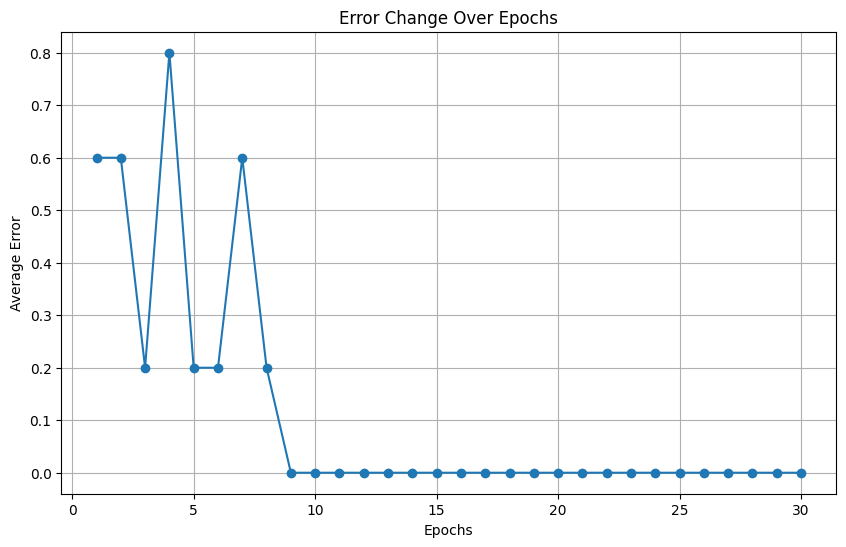

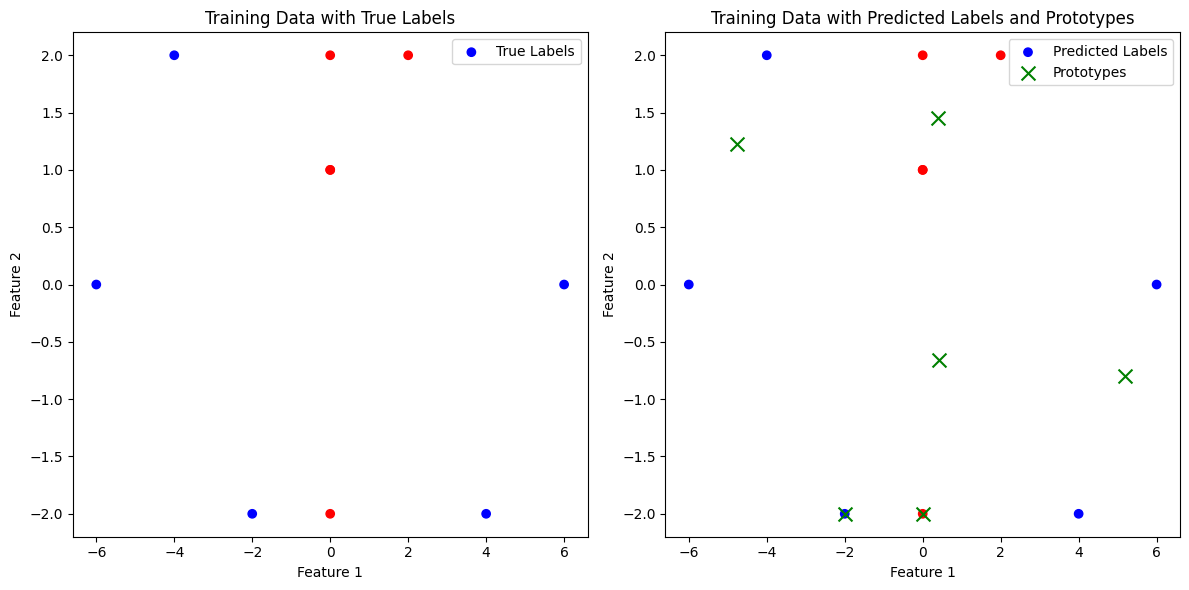

yout=
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]
error=
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [2]:
# Page152 7.1.4代码，增加误差下降、输入数据空间可视化
import numpy as np  # 用于数值计算
import random  # 用于生成随机数
import matplotlib.pyplot as plt  # 用于绘图

# 定义LVQ网络类
class LVQnet:
    def __init__(self, n_inputs, n_outputs, groups, lr=0.4, epochs=1000):
        # 初始化参数
        self.epochs = epochs  # 最大迭代次数
        self.lr = lr  # 学习率

        # 确保groups的长度等于n_outputs
        assert len(groups) == n_outputs
        self.g = groups  # 每个类别的原型向量数量
        self.k = sum(groups)  # 总的原型向量数量
        self.w1 = np.random.rand(self.k, n_inputs) * 0.01  # 初始化第一层权重矩阵，形状为 (k, n_inputs)
        self.w2 = np.zeros((n_outputs, self.k))  # 初始化第二层权重矩阵，形状为 (n_outputs, k)
        
        # 初始化第二层权重矩阵，使得每个类别对应的原型向量位置为1
        cnt = 0
        for i in range(len(self.g)):
            for j in range(self.g[i]):
                self.w2[i, cnt] = 1  # 设置对应位置为1
                cnt += 1

    def fit(self, X, Y):
        N = len(X)
        errors = []  # 用于记录每个epoch的平均误差
        for t in range(self.epochs):
            total_error = 0
            for _ in range(N):
                gamma = self.lr * (1 - t / self.epochs)
                idx = random.randint(0, N - 1)
                x = X[idx]
                out = self.predict(x)
                y = Y[idx]
                error = np.sum(abs(out - y))
                total_error += error
                if error == 0:
                    self.w1[self.win] += gamma * self.v[self.win]
                else:
                    self.w1[self.win] -= gamma * self.v[self.win]
            avg_error = total_error / N
            errors.append(avg_error)
            #print(f'Epoch {t+1}/{self.epochs}, Average Error: {avg_error:.4f}')
        self.plot_errors(errors)
        
    def predict(self, x):
        x = np.tile(x, (self.k, 1))  # 将输入样本复制k次，形状变为 (k, n_inputs)
        v = x - self.w1  # 计算输入样本与每个原型向量的差值
        self.v = v  # 保存差值矩阵
        distance = np.sum(v ** 2, axis=1).reshape(-1)  # 计算每个原型向量与输入样本的距离
        win = np.argmin(distance)  # 找到距离最近的原型向量的索引
        self.win = win  # 保存最近的原型向量的索引
        out = np.zeros((self.k, 1))  # 初始化输出向量
        out[win][0] = 1  # 将最近的原型向量对应的输出位置设为1
        out = self.w2.dot(out).reshape(-1)  # 通过第二层权重矩阵转换输出
        return out  # 返回最终的预测结果

    def plot_errors(self, errors):
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(errors) + 1), errors, marker='o', linestyle='-')
        plt.title('Error Change Over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Average Error')
        plt.grid(True)
        plt.show()
        
# 数据准备
X = np.array([
    [-6, 0],
    [-4, 2],
    [-2, -2],
    [0, 1],
    [0, 2],
    [0, -2],
    [0, 1],
    [2, 2],
    [4, -2],
    [6, 0]
])  # 输入数据

Y = np.array([
    [1, 0],
    [1, 0],
    [1, 0],
    [0, 1],
    [0, 1],
    [0, 1],
    [0, 1],
    [0, 1],
    [1, 0],
    [1, 0]
])  # 对应的标签数据

# 创建并训练 LVQ 网络
network = LVQnet(2, 2, groups=[4, 2], lr=0.5, epochs=30)
network.fit(X, Y)

# 预测所有输入数据
yout = []
for i in range(len(X)):
    yout.append(network.predict(X[i]))
yout = np.array(yout)

# 可视化训练数据和分类结果
plt.figure(figsize=(12, 6))

# 绘制原始数据点及其真实标签
colors_true = ['blue' if label[0] == 1 else 'red' for label in Y]
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=colors_true, marker='o', label='True Labels')
plt.title('Training Data with True Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# 绘制预测数据点及其预测标签
colors_pred = ['blue' if pred[0] >= 0.5 else 'red' for pred in yout]
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=colors_pred, marker='o', label='Predicted Labels')

# 绘制原型向量
plt.scatter(network.w1[:, 0], network.w1[:, 1], c='green', marker='x', s=100, label='Prototypes')
plt.title('Training Data with Predicted Labels and Prototypes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

# 输出预测结果和误差
print('yout=\n', yout)
print('error=\n', yout - Y)

### 7.2 对向传播神经网络

#### 书中代码-Page159 7.2.3

In [3]:
# 《人工神经网络理论、设计及应用》书中代码
# Page159 7.2.3

import numpy as np  # 导入NumPy库，用于数值计算
import random  # 导入random库，用于生成随机数
from copy import deepcopy  # 导入deepcopy，用于深拷贝对象
import matplotlib  # 导入Matplotlib库，用于绘图
from matplotlib import pyplot as plt  # 导入pyplot模块，用于绘制图表

class CPNnet:
    def __init__(self, n_input, n_output, k, lr=1, epochs=1000):
        self.V = np.random.rand(k, n_input)  # 初始化竞争层权重矩阵，形状为 (k, n_input)
        self.k = k  # 竞争层节点数
        self.W = np.zeros((k, n_output))  # 初始化反向传播层权重矩阵，形状为 (k, n_output)
        self.lr = lr  # 学习率
        self.epochs = epochs  # 训练轮数

    def fit(self, X, Y):
        means = np.tile(np.mean(X, axis=0), (self.k, 1))  # 计算输入数据的均值，并将其扩展为 (k, n_input) 形状
        self.V *= 2 * means  # 将竞争层权重矩阵乘以2倍的均值
        N = len(X)  # 训练样本数
        for t in range(self.epochs):
            eta = self.lr * (1 - t / self.epochs)  # 动态调整学习率
            idx = random.randint(0, N - 1)  # 随机选择一个样本索引
            x = X[idx]  # 获取随机选择的样本
            out = self.predict(x)  # 预测输出
            self.V[self.win] += eta * (x - self.V[self.win])  # 更新竞争层权重

        for t in range(self.epochs // 10):
            beta = self.lr * (1 - t / self.epochs)  # 动态调整学习率
            idx = random.randint(0, N - 1)  # 随机选择一个样本索引
            x = X[idx]  # 获取随机选择的样本
            y = Y[idx]  # 获取对应的标签
            out = self.predict(x)  # 预测输出
            delta = out - y  # 计算误差
            self.W[self.win] -= beta * delta  # 更新反向传播层权重

    def predict(self, x0):
        x = deepcopy(x0)  # 深拷贝输入样本
        # print("adfasdaf:", x)  # 调试信息，打印输入样本
        minus = self.V - np.tile(x, (len(self.V), 1))  # 计算输入样本与竞争层权重的差值
        dist = np.sum(minus ** 2, axis=1).reshape(-1)  # 计算每个竞争层节点与输入样本的距离
        win = np.argmin(dist)  # 找到距离最小的竞争层节点索引
        self.win = win  # 保存获胜节点索引
        out = self.W[win]  # 获取获胜节点对应的反向传播层权重作为输出
        return out  # 返回预测输出

# 数据准备
X0 = np.array([
    [0.0, 0.0],
    [0.2, 0.0],
    [0.0, 0.4],
    [1.0, 0.5],
    [0.4, 1.0]
])  # 输入数据

Y0 = np.array([
    [1, 0, 0, 0],
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])  # 对应的标签

X = deepcopy(X0)  # 深拷贝输入数据
Y = deepcopy(Y0)  # 深拷贝标签
n_input = len(X0[0])  # 输入特征数
n_output = len(Y0[0])  # 输出特征数

# test by renhj
# print("X0,Y0,X,Y,n_input,n_output:", X0, Y0, X, Y, n_input, n_output)  # 调试信息，打印数据和参数

# 创建并训练CPN网络
cpn = CPNnet(n_input, n_output, k=10, lr=0.8, epochs=1000)
cpn.fit(X, Y)

# 测试和输出
print('out')  # 打印输出标题
out = list()  # 初始化输出列表
for x in X:
    print(cpn.predict(x))  # 打印每个输入样本的预测输出
    out.append(cpn.predict(x))  # 将预测输出添加到列表中

out = np.array(out)  # 将输出列表转换为NumPy数组
error = out - Y0  # 计算预测输出与实际标签之间的误差
print("error:\n", error)  # 打印误差

print()  # 打印空行
print("test:")  # 打印测试标题
x = np.array([0.2, 1])  # 定义一个测试输入样本
print("x=:\n", x)  # 打印测试输入样本
print("out:\n", cpn.predict(x))  # 打印测试输入样本的预测输出

out
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
error:
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -5.88418203e-15  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.25375274e-14  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

test:
x=:
 [0.2 1. ]
out:
 [0. 0. 0. 1.]


#### Page162 单获胜节点CPN

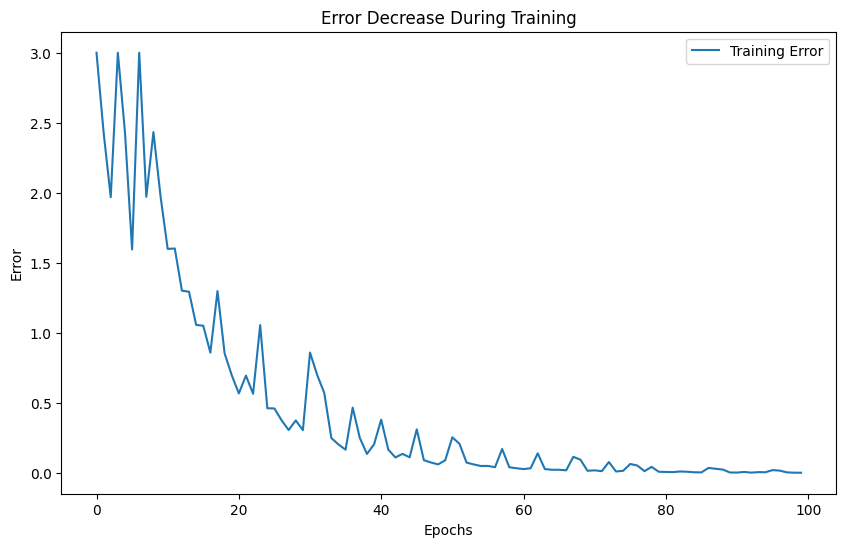

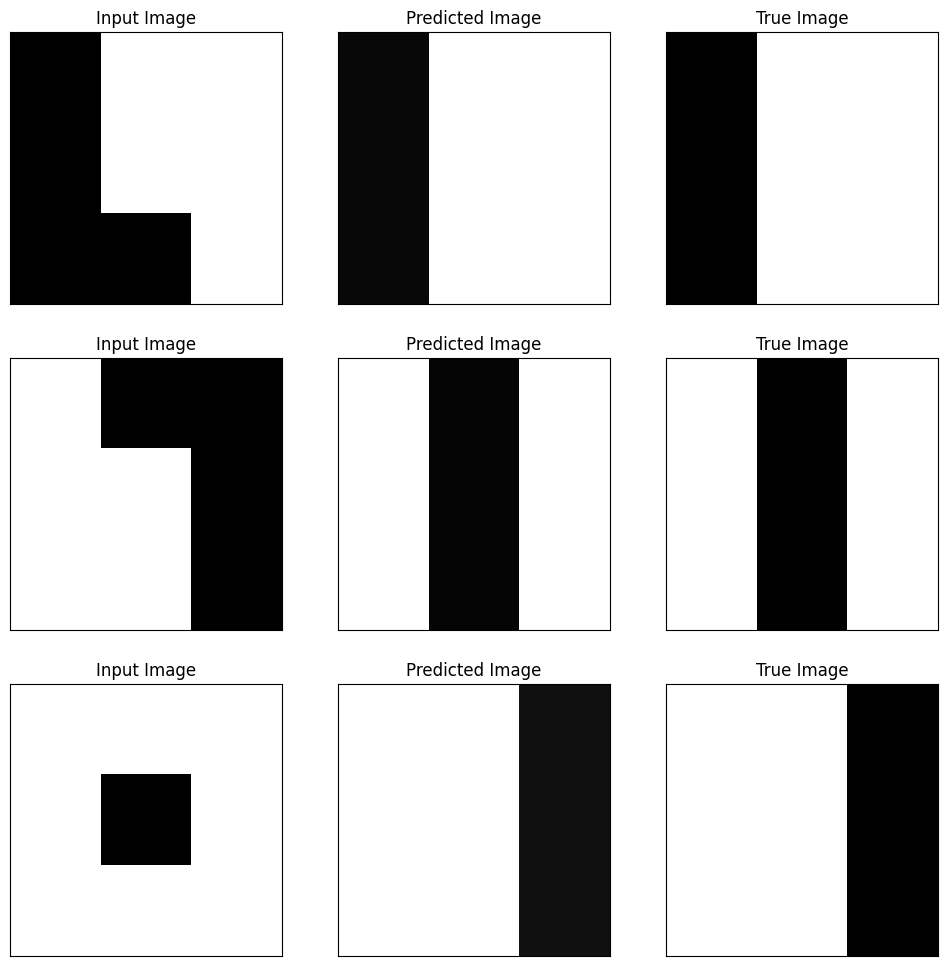

In [4]:
# Page162 单获胜节点CPN

import numpy as np  # 导入NumPy库，用于数值计算
import random  # 导入random库，用于生成随机数
from copy import deepcopy  # 导入deepcopy，用于深拷贝对象
import matplotlib  # 导入Matplotlib库，用于绘图
from matplotlib import pyplot as plt  # 导入pyplot模块，用于绘制图表

# 定义训练数据和期望输出
train_data = [
    np.array([1, 0, 0, 1, 0, 0, 1, 1, 0]),  # 全黑
    np.array([0, 1, 1, 0, 0, 1, 0, 0, 1]),  # 全白
    np.array([0, 0, 0, 0, 1, 0, 0, 0, 0])  # 左上角黑色，其余白色
]
train_labels = [
    np.array([1, 0, 0, 1, 0, 0, 1, 0, 0]),  # 全黑
    np.array([0, 1, 0, 0, 1, 0, 0, 1, 0]),  # 全白
    np.array([0, 0, 1, 0, 0, 1, 0, 0, 1])  # 左上角黑色，其余白色
]

# 定义测试数据和期望输出
test_data = [
    np.array([1, 0, 0, 1, 0, 0, 1, 1, 0]),  # 左上角黑色，其余白色
    np.array([0, 1, 1, 0, 0, 1, 0, 0, 1]),  # 右下角黑色，其余白色
    np.array([0, 0, 0, 0, 1, 0, 0, 0, 0])  # 右下角黑色，其余白色
]
test_labels = [
    np.array([1, 0, 0, 1, 0, 0, 1, 0, 0]),  # 左上角黑色，其余白色
    np.array([0, 1, 0, 0, 1, 0, 0, 1, 0]),  # 右下角黑色，其余白色
    np.array([0, 0, 1, 0, 0, 1, 0, 0, 1])  # 右下角黑色，其余白色
]

class CPNnet:
    def __init__(self, n_input, n_output, k, lr=1, epochs=1000):
        self.V = np.random.rand(k, n_input)  # 初始化竞争层权重矩阵，形状为 (k, n_input)
        self.k = k  # 竞争层节点数
        self.W = np.zeros((k, n_output))  # 初始化反向传播层权重矩阵，形状为 (k, n_output)
        self.lr = lr  # 学习率
        self.epochs = epochs  # 训练轮数

    def fit(self, X, Y):
        means = np.tile(np.mean(X, axis=0), (self.k, 1))  # 计算输入数据的均值，并将其扩展为 (k, n_input) 形状
        self.V *= 2 * means  # 将竞争层权重矩阵乘以2倍的均值
        N = len(X)  # 训练样本数
        errors = []  # 用于记录每轮训练的误差值
        
        for t in range(self.epochs):
            eta = self.lr * (1 - t / self.epochs)  # 动态调整学习率
            idx = random.randint(0, N - 1)  # 随机选择一个样本索引
            x = X[idx]  # 获取随机选择的样本
            winner = self.predict_single(x)  # 预测输出并获取单个获胜节点
            self.V[winner] += eta * (x - self.V[winner])  # 更新竞争层权重

        for t in range(self.epochs // 10):
            beta = self.lr * (1 - t / self.epochs)  # 动态调整学习率
            idx = random.randint(0, N - 1)  # 随机选择一个样本索引
            x = X[idx]  # 获取随机选择的样本
            y = Y[idx]  # 获取对应的标签
            winner = self.predict_single(x)  # 预测输出并获取单个获胜节点
            out = self.W[winner]  # 获取获胜节点对应的反向传播层权重作为输出
            delta = out - y  # 计算误差
            error = np.sum(delta ** 2)  # 计算平方误差
            errors.append(error)  # 记录误差值
            self.W[winner] -= beta * delta  # 更新反向传播层权重
        
        return errors  # 返回误差值列表

    def predict_single(self, x0):
        x = deepcopy(x0)  # 深拷贝输入样本
        minus = self.V - np.tile(x, (len(self.V), 1))  # 计算输入样本与竞争层权重的差值
        dist = np.sum(minus ** 2, axis=1).reshape(-1)  # 计算每个竞争层节点与输入样本的距离
        winner = np.argmin(dist)  # 找到距离最小的竞争层节点索引
        self.winner = winner  # 保存获胜节点索引
        out = self.W[winner]  # 获取获胜节点对应的反向传播层权重作为输出
        return winner  # 返回单个获胜节点索引

    def predict(self, x0):
        x = deepcopy(x0)  # 深拷贝输入样本
        minus = self.V - np.tile(x, (len(self.V), 1))  # 计算输入样本与竞争层权重的差值
        dist = np.sum(minus ** 2, axis=1).reshape(-1)  # 计算每个竞争层节点与输入样本的距离
        winner = np.argmin(dist)  # 找到距离最小的竞争层节点索引
        self.winner = winner  # 保存获胜节点索引
        out = self.W[winner]  # 获取获胜节点对应的反向传播层权重作为输出
        return out, winner  # 返回预测输出和获胜节点索引

def visualize_results(input_data, predicted_outputs, true_labels, num_samples=3):
    fig, axes = plt.subplots(nrows=num_samples, ncols=3, figsize=(12, 4 * num_samples))
    for i in range(num_samples):
        ax = axes[i]
        image = input_data[i].reshape(3, 3)
        predicted_image = predicted_outputs[i].reshape(3, 3)
        true_image = true_labels[i].reshape(3, 3)
        
        # 使用 gray_r 色彩映射来反转图像的颜色
        ax[0].imshow(image, cmap='gray_r', vmin=0, vmax=1)
        ax[0].set_title(f'Input Image')
        ax[0].axis('on')
        draw_grid(ax[0])
        
        ax[1].imshow(predicted_image, cmap='gray_r', vmin=0, vmax=1)
        ax[1].set_title(f'Predicted Image')
        ax[1].axis('on')
        draw_grid(ax[1])
        
        ax[2].imshow(true_image, cmap='gray_r', vmin=0, vmax=1)
        ax[2].set_title(f'True Image')
        ax[2].axis('on')
        draw_grid(ax[2])
    plt.show()

def draw_grid(ax):
    # 设置网格线的位置
    ax.set_xticks(np.arange(-0.5, 3.5, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, 3.5, 1), minor=True)
    
    # 绘制网格线
    ax.grid(which='minor', color='black', linestyle='-', linewidth=1)
    
    # 隐藏刻度线和标签
    ax.tick_params(which='both', length=0)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# 主程序
if __name__ == "__main__":
    # 初始化CPN网络
    cpn = CPNnet(n_input=9, n_output=9, k=10, lr=0.1, epochs=1000)
    
    # 训练CPN网络并记录误差值
    errors = cpn.fit(train_data, train_labels)
    
    # 绘制误差下降曲线
    plt.figure(figsize=(10, 6))
    plt.plot(errors, label='Training Error')
    plt.title('Error Decrease During Training')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.legend()
    plt.show()
    
    # 测试CPN网络
    predicted_outputs = [cpn.predict(x)[0] for x in test_data]
    
    # 可视化展示输入和输出结果
    visualize_results(test_data, predicted_outputs, test_labels, 3)

#### Page162 7.2.4.1双获胜节点CPN

self.V:
 [[4.51245311e-01 2.08905699e-01 6.29860316e-01 5.39214318e-02
  5.37961278e-02 4.52035806e-02 2.87273430e-01 6.19524944e-01
  4.64624244e-01]
 [1.38210537e-25 1.18324293e-24 6.77971334e-25 1.23294280e-24
  1.00000000e+00 7.86874102e-25 1.06235407e-24 1.33105519e-25
  1.00132398e-24]
 [1.00000000e+00 4.91055654e-23 3.63693724e-25 1.00000000e+00
  1.14547470e-23 6.90536253e-24 1.00000000e+00 1.00000000e+00
  7.00923408e-23]
 [4.63627893e-23 1.00000000e+00 1.00000000e+00 2.82016359e-24
  1.47039130e-23 1.00000000e+00 8.30246425e-25 5.40088544e-23
  1.00000000e+00]]
------------------------------------------------------------------
self.W:
 [[0.        0.        0.        0.        0.        0.        0.
  0.        0.       ]
 [0.        0.        0.9999266 0.        0.        0.9999266 0.
  0.        0.9999266]
 [0.9998887 0.        0.        0.9998887 0.        0.        0.9998887
  0.        0.       ]
 [0.        0.999988  0.        0.        0.999988  0.        0.
  0.999988

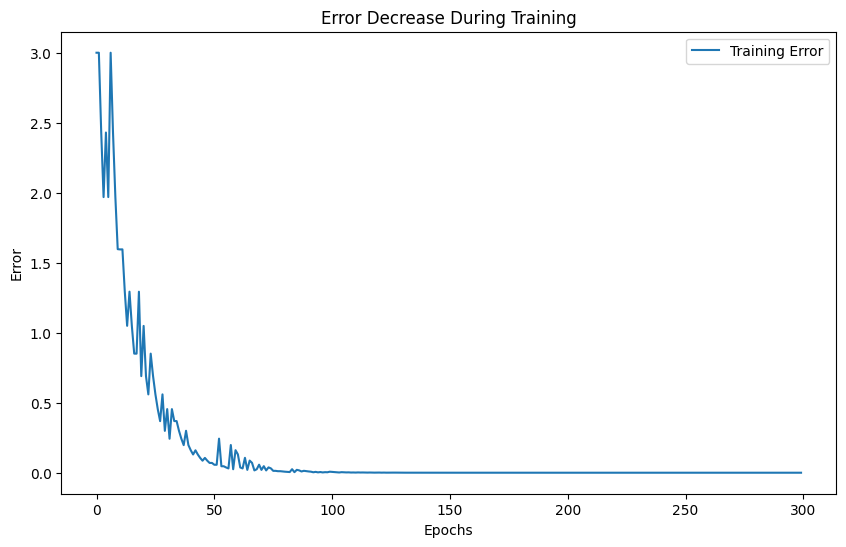

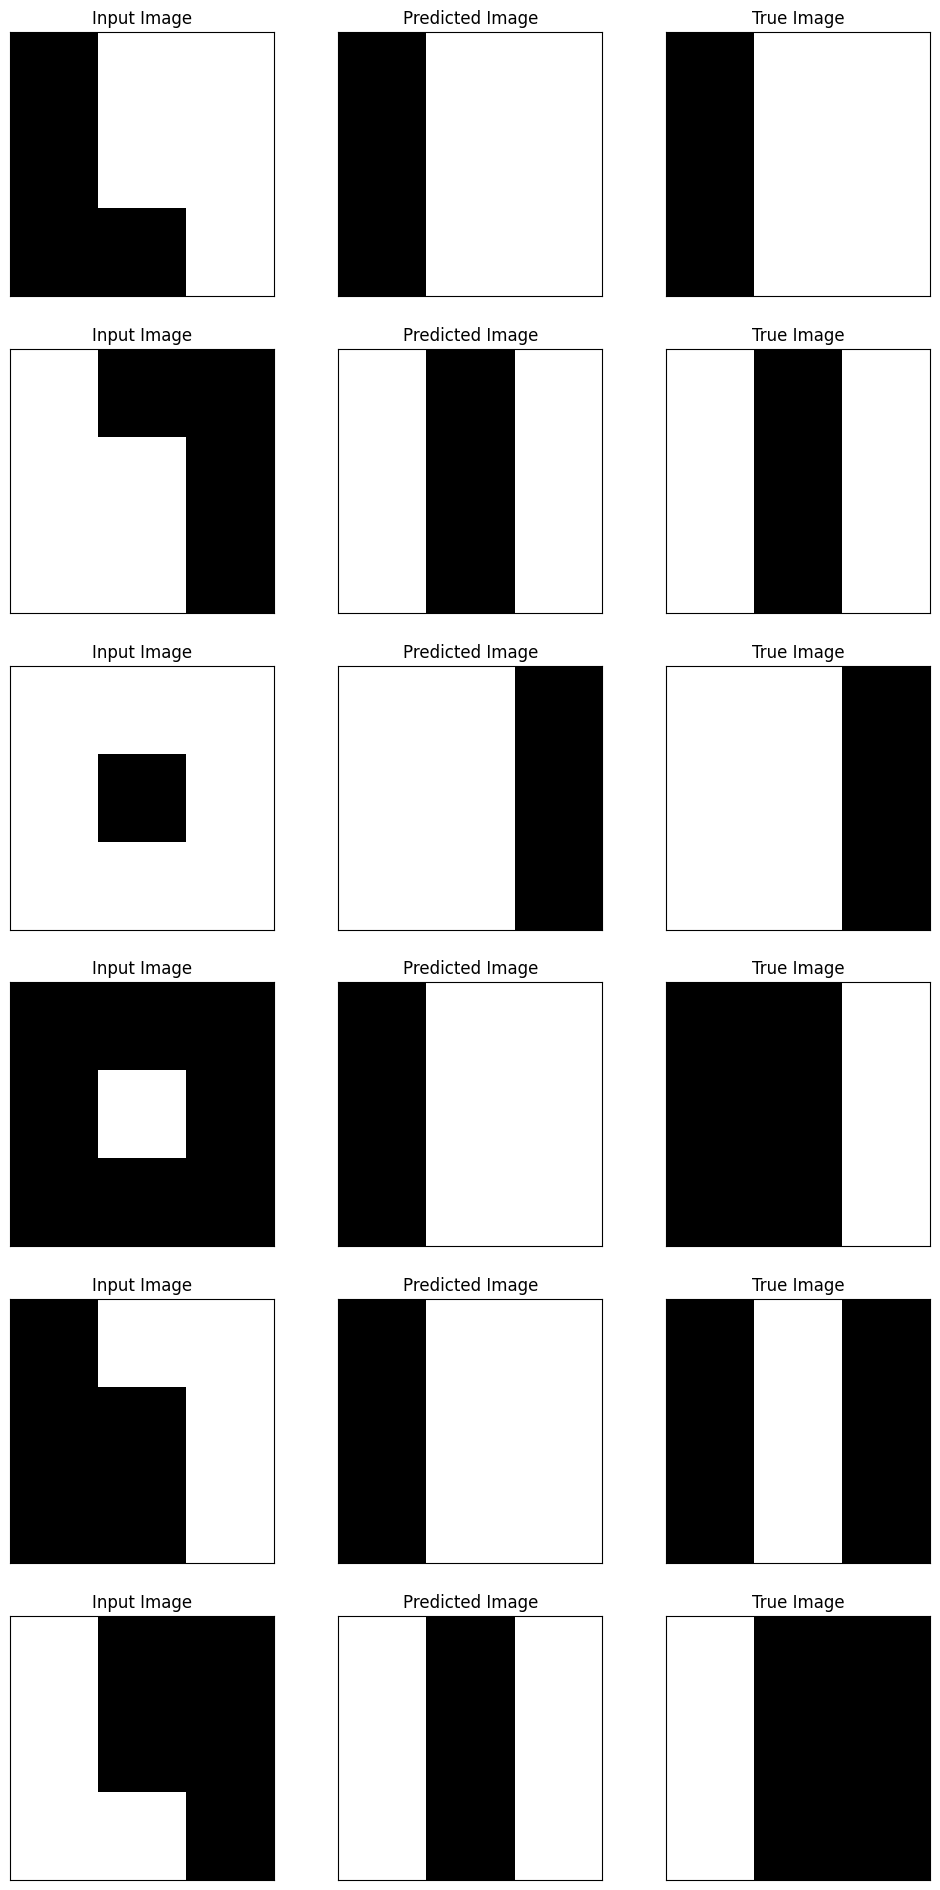

In [5]:
# Page162 7.2.4.1双获胜节点CPN
# 只是在训练后推理阶段允许双获胜节点，由于记忆了模式的神经元受到噪声输入干扰，很可能无法正常输出。

import numpy as np  # 导入NumPy库，用于数值计算
import random  # 导入random库，用于生成随机数
from copy import deepcopy  # 导入deepcopy，用于深拷贝对象
import matplotlib  # 导入Matplotlib库，用于绘图
from matplotlib import pyplot as plt  # 导入pyplot模块，用于绘制图表

# 定义训练数据和期望输出
train_data = [
    np.array([1, 0, 0, 1, 0, 0, 1, 1, 0]),  # 全黑
    np.array([0, 1, 1, 0, 0, 1, 0, 0, 1]),  # 全白
    np.array([0, 0, 0, 0, 1, 0, 0, 0, 0])  # 左上角黑色，其余白色
]
train_labels = [
    np.array([1, 0, 0, 1, 0, 0, 1, 0, 0]),  # 全黑
    np.array([0, 1, 0, 0, 1, 0, 0, 1, 0]),  # 全白
    np.array([0, 0, 1, 0, 0, 1, 0, 0, 1])  # 左上角黑色，其余白色
]

# 定义测试数据和期望输出
test_data = [
    np.array([1, 0, 0, 1, 0, 0, 1, 1, 0]),  # 左上角黑色，其余白色
    np.array([0, 1, 1, 0, 0, 1, 0, 0, 1]),  # 右下角黑色，其余白色
    np.array([0, 0, 0, 0, 1, 0, 0, 0, 0]),  # 右下角黑色，其余白色
    np.array([1, 1, 1, 1, 0, 1, 1, 1, 1]),  # 左上角黑色，其余白色
    np.array([1, 0, 0, 1, 1, 0, 1, 1, 0]),  # 右下角黑色，其余白色
    np.array([0, 1, 1, 0, 1, 1, 0, 0, 1])
]
test_labels = [
    np.array([1, 0, 0, 1, 0, 0, 1, 0, 0]),  # 左上角黑色，其余白色
    np.array([0, 1, 0, 0, 1, 0, 0, 1, 0]),  # 右下角黑色，其余白色
    np.array([0, 0, 1, 0, 0, 1, 0, 0, 1]),  # 右下角黑色，其余白色
    np.array([1, 1, 0, 1, 1, 0, 1, 1, 0]),  # 左上角黑色，其余白色
    np.array([1, 0, 1, 1, 0, 1, 1, 0, 1]),  # 右下角黑色，其余白色
    np.array([0, 1, 1, 0, 1, 1, 0, 1, 1])  # 右下角黑色，其余白色
]

class CPNnet:
    def __init__(self, n_input, n_output, k, lr=1, epochs=1000):
        self.V = np.random.rand(k, n_input)  # 初始化竞争层权重矩阵，形状为 (k, n_input)
        self.k = k  # 竞争层节点数
        self.W = np.zeros((k, n_output))  # 初始化反向传播层权重矩阵，形状为 (k, n_output)
        self.lr = lr  # 学习率
        self.epochs = epochs  # 训练轮数

    def fit(self, X, Y):
        means = np.tile(np.mean(X, axis=0), (self.k, 1))  # 计算输入数据的均值，并将其扩展为 (k, n_input) 形状
        self.V *= 2 * means  # 将竞争层权重矩阵乘以2倍的均值
        N = len(X)  # 训练样本数
        errors = []  # 用于记录每轮训练的误差值
        
        for t in range(self.epochs):
            eta = self.lr * (1 - t / self.epochs)  # 动态调整学习率
            idx = random.randint(0, N - 1)  # 随机选择一个样本索引
            x = X[idx]  # 获取随机选择的样本
            winner = self.predict_single(x)  # 预测输出并获取单个获胜节点
            self.V[winner] += eta * (x - self.V[winner])  # 更新竞争层权重

        for t in range(self.epochs // 10):
            beta = self.lr * (1 - t / self.epochs)  # 动态调整学习率
            idx = random.randint(0, N - 1)  # 随机选择一个样本索引
            x = X[idx]  # 获取随机选择的样本
            y = Y[idx]  # 获取对应的标签
            winner = self.predict_single(x)  # 预测输出并获取单个获胜节点
            out = self.W[winner]  # 获取获胜节点对应的反向传播层权重作为输出
            delta = out - y  # 计算误差
            error = np.sum(delta ** 2)  # 计算平方误差
            errors.append(error)  # 记录误差值
            self.W[winner] -= beta * delta  # 更新反向传播层权重
        print("self.V:\n",self.V)
        print("------------------------------------------------------------------")
        print("self.W:\n",self.W)
        return errors  # 返回误差值列表

    def predict_single(self, x0):
        x = deepcopy(x0)  # 深拷贝输入样本
        minus = self.V - np.tile(x, (len(self.V), 1))  # 计算输入样本与竞争层权重的差值
        dist = np.sum(minus ** 2, axis=1).reshape(-1)  # 计算每个竞争层节点与输入样本的距离
        winner = np.argmin(dist)  # 找到距离最小的竞争层节点索引
        self.winner = winner  # 保存获胜节点索引
        out = self.W[winner]  # 获取获胜节点对应的反向传播层权重作为输出
        return winner  # 返回单个获胜节点索引

    def predict(self, x0):
        x = deepcopy(x0)  # 深拷贝输入样本
        minus = self.V - np.tile(x, (len(self.V), 1))  # 计算输入样本与竞争层权重的差值
        dist = np.sum(minus ** 2, axis=1).reshape(-1)  # 计算每个竞争层节点与输入样本的距离
        sorted_indices = np.argsort(dist)  # 对距离进行排序并获取索引
        winners = sorted_indices[:2]  # 获取距离最近的两个节点索引（选择2时是双获胜，1时是单获胜）
        #out = np.mean(self.W[winners], axis=0)  # 计算两个获胜节点的权重平均值作为输出
        out = np.sum(self.W[winners], axis=0)
        return out, winners  # 返回预测输出和获胜节点索引

def visualize_results(input_data, predicted_outputs, true_labels, num_samples=3):
    fig, axes = plt.subplots(nrows=num_samples, ncols=3, figsize=(12, 4 * num_samples))
    for i in range(num_samples):
        ax = axes[i]
        image = input_data[i].reshape(3, 3)
        predicted_image = predicted_outputs[i].reshape(3, 3)
        true_image = true_labels[i].reshape(3, 3)
        
        # 使用 gray_r 色彩映射来反转图像的颜色
        ax[0].imshow(image, cmap='gray_r', vmin=0, vmax=1)
        ax[0].set_title(f'Input Image')
        ax[0].axis('on')
        draw_grid(ax[0])
        
        ax[1].imshow(predicted_image, cmap='gray_r', vmin=0, vmax=1)
        ax[1].set_title(f'Predicted Image')
        ax[1].axis('on')
        draw_grid(ax[1])
        
        ax[2].imshow(true_image, cmap='gray_r', vmin=0, vmax=1)
        ax[2].set_title(f'True Image')
        ax[2].axis('on')
        draw_grid(ax[2])
    plt.show()

def draw_grid(ax):
    # 设置网格线的位置
    ax.set_xticks(np.arange(-0.5, 3.5, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, 3.5, 1), minor=True)
    
    # 绘制网格线
    ax.grid(which='minor', color='black', linestyle='-', linewidth=1)
    
    # 隐藏刻度线和标签
    ax.tick_params(which='both', length=0)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# 主程序
if __name__ == "__main__":
    # 初始化CPN网络
    cpn = CPNnet(n_input=9, n_output=9, k=4, lr=0.1, epochs=3000)
    
    # 训练CPN网络并记录误差值
    errors = cpn.fit(train_data, train_labels)
    
    # 绘制误差下降曲线
    plt.figure(figsize=(10, 6))
    plt.plot(errors, label='Training Error')
    plt.title('Error Decrease During Training')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.legend()
    plt.show()
    
    # 测试CPN网络
    predicted_outputs = [cpn.predict(x)[0] for x in test_data]
    
    # 可视化展示输入和输出结果
    visualize_results(test_data, predicted_outputs, test_labels, 6)

#### 延展-Page162 7.2.4.1双获胜节点CPN

--------------------------reset-------------------------------
self.V: [[3.53239983e-01 5.69536287e-01 2.21633182e-01 1.71386682e-01
  9.35386708e-02 1.08687663e-01 4.36671109e-01 5.64380811e-01
  6.72446049e-03]
 [6.44944969e-01 2.47322892e-01 1.29779630e-01 7.37451277e-03
  2.28903938e-01 4.22615259e-01 5.44706246e-01 8.88465976e-02
  2.70542141e-01]
 [4.09386295e-01 2.86283856e-01 9.47642087e-02 6.09208689e-02
  6.93038166e-02 5.99754508e-01 3.45567891e-01 4.73682908e-01
  1.17459109e-01]
 [4.46922476e-01 8.99633251e-02 4.66554326e-01 2.52762090e-01
  5.21167667e-01 4.98021362e-01 5.74102907e-01 1.26525625e-01
  2.61338433e-01]
 [9.99999992e-01 8.80171994e-09 4.09451187e-09 9.99999993e-01
  3.55880234e-09 2.22391687e-10 9.99999995e-01 9.99999994e-01
  1.79181301e-10]
 [4.85174153e-02 4.88711994e-01 1.16795968e-01 9.15231107e-02
  2.94576726e-01 3.21548216e-01 3.52178958e-01 1.55510182e-01
  4.60005001e-01]
 [1.40303045e-09 3.89081727e-09 9.48433464e-09 1.42897422e-08
  9.99999985e-0

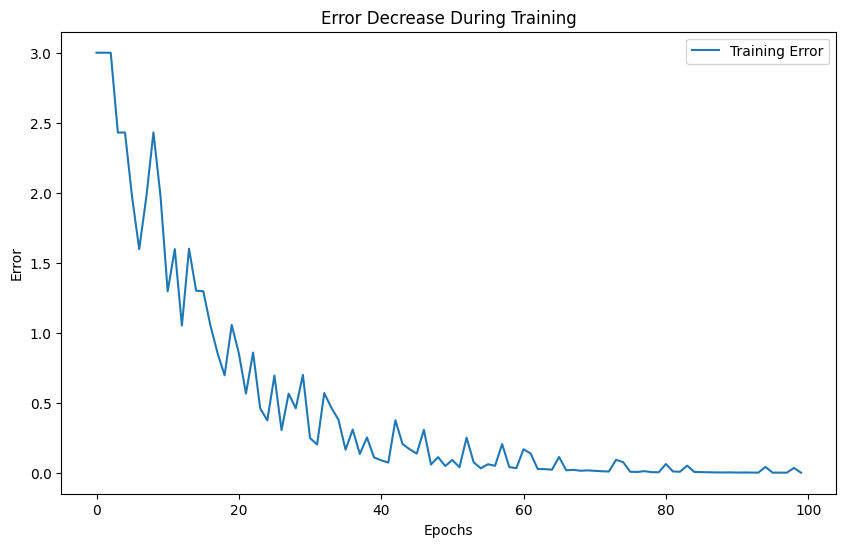

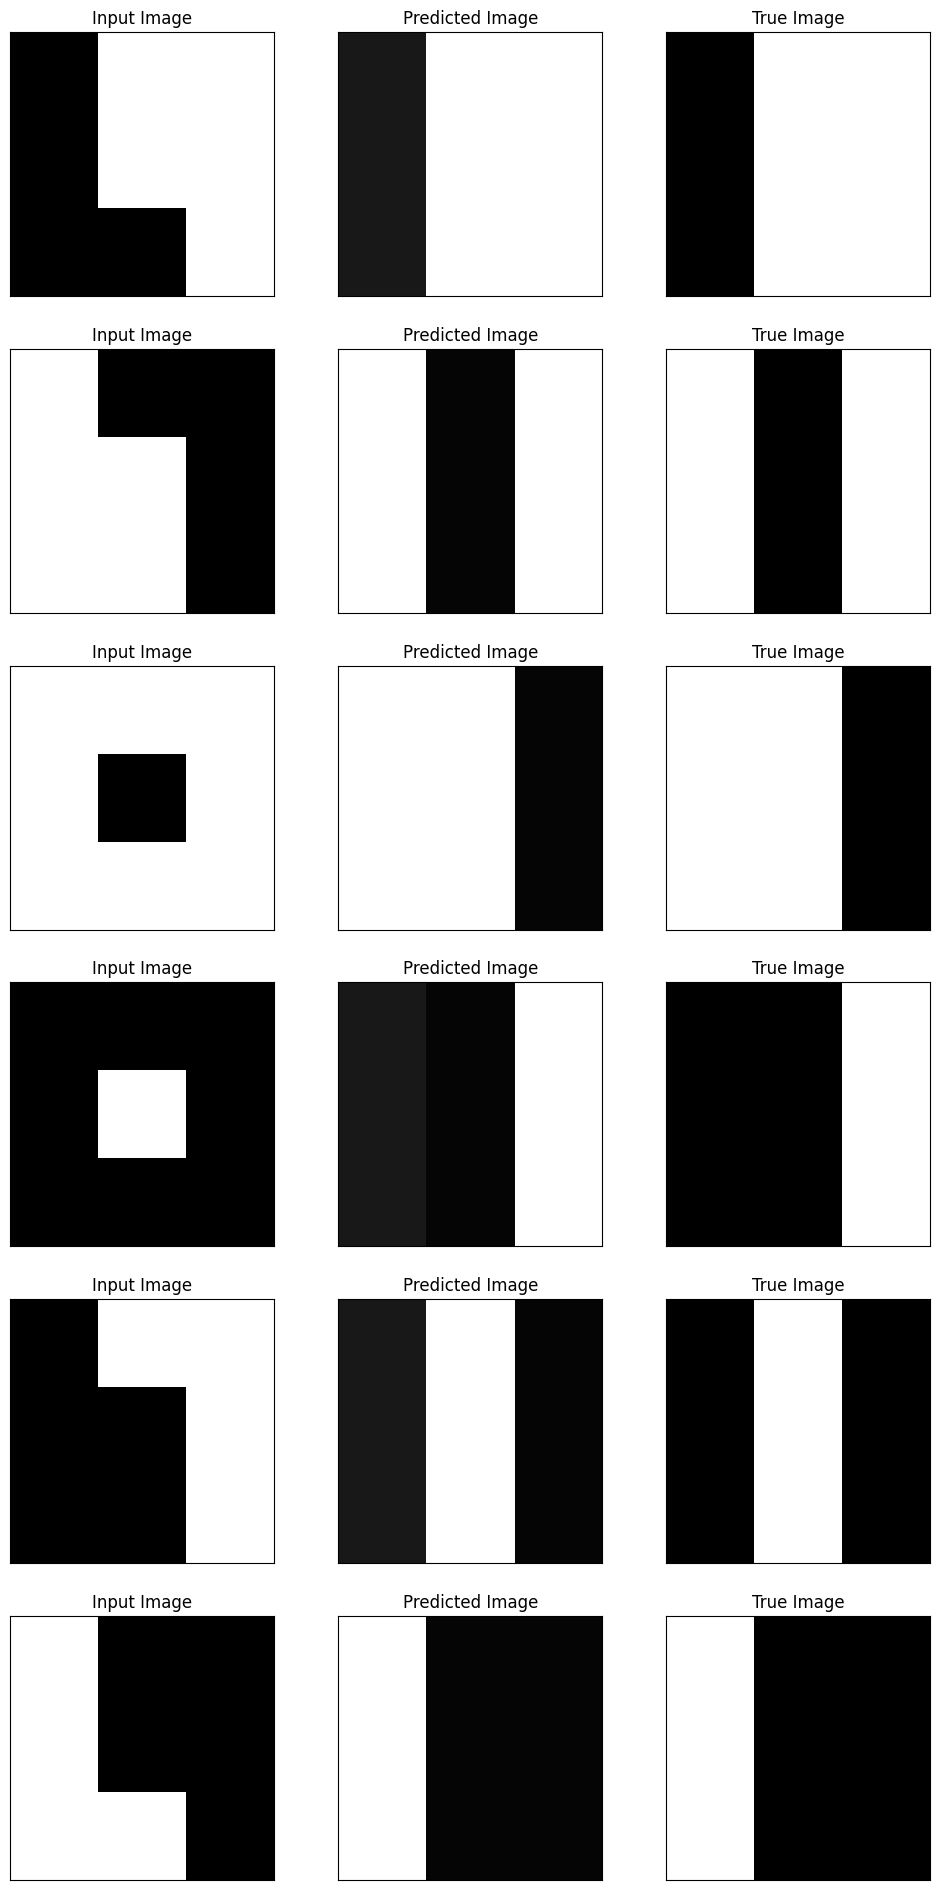

In [6]:
# 仅将获胜节点从1个改变为两个，并不能获得对输入中多个已训练结果的叠加，这是因为采取了排序选择与输入模式距离前两个的方式，而掺杂有其它输入模式的输入，很可能使输入中包含的二者距离有间隔。
#为了避免激活过神经元未更新权重对未来有干扰输入的误响应，采取训练结束时将闲置权重置零,也就是屏蔽掉与自身无关的输入分量，降低无关维度权重的干扰,相当于剪枝了未更新过权重的连接。
# 从保持这个模型支持持续训练的角度，可以在训练开始时对所有为零权重进行初始化。

import numpy as np  # 导入NumPy库，用于数值计算
import random  # 导入random库，用于生成随机数
from copy import deepcopy  # 导入deepcopy，用于深拷贝对象
import matplotlib  # 导入Matplotlib库，用于绘图
from matplotlib import pyplot as plt  # 导入pyplot模块，用于绘制图表

# 定义训练数据和期望输出
train_data = [
    np.array([1, 0, 0, 1, 0, 0, 1, 1, 0]),  # 全黑
    np.array([0, 1, 1, 0, 0, 1, 0, 0, 1]),  # 全白
    np.array([0, 0, 0, 0, 1, 0, 0, 0, 0])  # 左上角黑色，其余白色
]
train_labels = [
    np.array([1, 0, 0, 1, 0, 0, 1, 0, 0]),  # 全黑
    np.array([0, 1, 0, 0, 1, 0, 0, 1, 0]),  # 全白
    np.array([0, 0, 1, 0, 0, 1, 0, 0, 1])  # 左上角黑色，其余白色
]

# 定义测试数据和期望输出
test_data = [
    np.array([1, 0, 0, 1, 0, 0, 1, 1, 0]),  # 左上角黑色，其余白色
    np.array([0, 1, 1, 0, 0, 1, 0, 0, 1]),  # 右下角黑色，其余白色
    np.array([0, 0, 0, 0, 1, 0, 0, 0, 0]),  # 右下角黑色，其余白色
    np.array([1, 1, 1, 1, 0, 1, 1, 1, 1]),  # 左上角黑色，其余白色
    np.array([1, 0, 0, 1, 1, 0, 1, 1, 0]),  # 右下角黑色，其余白色
    np.array([0, 1, 1, 0, 1, 1, 0, 0, 1])
]
test_labels = [
    np.array([1, 0, 0, 1, 0, 0, 1, 0, 0]),  # 左上角黑色，其余白色
    np.array([0, 1, 0, 0, 1, 0, 0, 1, 0]),  # 右下角黑色，其余白色
    np.array([0, 0, 1, 0, 0, 1, 0, 0, 1]),  # 右下角黑色，其余白色
    np.array([1, 1, 0, 1, 1, 0, 1, 1, 0]),  # 左上角黑色，其余白色
    np.array([1, 0, 1, 1, 0, 1, 1, 0, 1]),  # 右下角黑色，其余白色
    np.array([0, 1, 1, 0, 1, 1, 0, 1, 1])  # 右下角黑色，其余白色
]

class CPNnet:
    def __init__(self, n_input, n_output, k, lr=1, epochs=1000):
        self.V = np.random.rand(k, n_input)  # 初始化竞争层权重矩阵，形状为 (k, n_input)
        self.k = k  # 竞争层节点数
        self.W = np.zeros((k, n_output))  # 初始化反向传播层权重矩阵，形状为 (k, n_output)
        self.lr = lr  # 学习率
        self.epochs = epochs  # 训练轮数
        self.updated = np.zeros(k, dtype=bool)  # 记录每个神经元是否被更新过

    def fit(self, X, Y):
        means = np.tile(np.mean(X, axis=0), (self.k, 1))  # 计算输入数据的均值，并将其扩展为 (k, n_input) 形状
        self.V *= 2 * means  # 将竞争层权重矩阵乘以2倍的均值
        N = len(X)  # 训练样本数
        errors = []  # 用于记录每轮训练的误差值
        
        for t in range(self.epochs):
            eta = self.lr * (1 - t / self.epochs)  # 动态调整学习率
            idx = random.randint(0, N - 1)  # 随机选择一个样本索引
            x = X[idx]  # 获取随机选择的样本
            winner = self.predict_single(x)  # 预测输出并获取单个获胜节点
            self.V[winner] += eta * (x - self.V[winner])  # 更新竞争层权重
            self.updated[winner] = True  # 标记该神经元已被更新

        for t in range(self.epochs // 10):
            beta = self.lr * (1 - t / self.epochs)  # 动态调整学习率
            idx = random.randint(0, N - 1)  # 随机选择一个样本索引
            x = X[idx]  # 获取随机选择的样本
            y = Y[idx]  # 获取对应的标签
            winner = self.predict_single(x)  # 预测输出并获取单个获胜节点
            out = self.W[winner]  # 获取获胜节点对应的反向传播层权重作为输出
            delta = out - y  # 计算误差
            error = np.sum(delta ** 2)  # 计算平方误差
            errors.append(error)  # 记录误差值
            self.W[winner] -= beta * delta  # 更新反向传播层权重
            self.updated[winner] = True  # 标记该神经元已被更新
     
        return errors  # 返回误差值列表

    def predict_single(self, x0):
        x = deepcopy(x0)  # 深拷贝输入样本
        minus = self.V - np.tile(x, (len(self.V), 1))  # 计算输入样本与竞争层权重的差值
        dist = np.sum(minus ** 2, axis=1).reshape(-1)  # 计算每个竞争层节点与输入样本的距离
        winner = np.argmin(dist)  # 找到距离最小的竞争层节点索引
        self.winner = winner  # 保存获胜节点索引
        out = self.W[winner]  # 获取获胜节点对应的反向传播层权重作为输出
        return winner  # 返回单个获胜节点索引

    def predict(self, x0):
        x = deepcopy(x0)  # 深拷贝输入样本
        minus = self.V - np.tile(x, (len(self.V), 1))  # 计算输入样本与竞争层权重的差值
        dist = np.sum(minus ** 2, axis=1).reshape(-1)  # 计算每个竞争层节点与输入样本的距离
        sorted_indices = np.argsort(dist)  # 对距离进行排序并获取索引
        winners = sorted_indices[:2]  # 获取距离最近的两个节点索引
        out = np.sum(self.W[winners], axis=0)  # 叠加两个获胜节点的权重值
        return out, winners  # 返回预测输出和获胜节点索引

    def prune_weights(self):
        print("--------------------------reset-------------------------------")
        print("self.V:",self.V)
        print("self.W:",self.W)
        # 将未更新过的神经元的权重置零
        self.V[~self.updated] = 0
        self.W[~self.updated] = 0
        print("--------------------------reset after-------------------------------")
        print("self.V:",self.V)
        print("self.W:",self.W)

def visualize_results(input_data, predicted_outputs, true_labels, num_samples=3):
    fig, axes = plt.subplots(nrows=num_samples, ncols=3, figsize=(12, 4 * num_samples))
    for i in range(num_samples):
        ax = axes[i]
        image = input_data[i].reshape(3, 3)
        predicted_image = predicted_outputs[i].reshape(3, 3)
        true_image = true_labels[i].reshape(3, 3)
        
        # 使用 gray_r 色彩映射来反转图像的颜色
        ax[0].imshow(image, cmap='gray_r', vmin=0, vmax=1)
        ax[0].set_title(f'Input Image')
        ax[0].axis('on')
        draw_grid(ax[0])
        
        ax[1].imshow(predicted_image, cmap='gray_r', vmin=0, vmax=1)
        ax[1].set_title(f'Predicted Image')
        ax[1].axis('on')
        draw_grid(ax[1])
        
        ax[2].imshow(true_image, cmap='gray_r', vmin=0, vmax=1)
        ax[2].set_title(f'True Image')
        ax[2].axis('on')
        draw_grid(ax[2])
    plt.show()

def draw_grid(ax):
    # 设置网格线的位置
    ax.set_xticks(np.arange(-0.5, 3.5, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, 3.5, 1), minor=True)
    
    # 绘制网格线
    ax.grid(which='minor', color='black', linestyle='-', linewidth=1)
    
    # 隐藏刻度线和标签
    ax.tick_params(which='both', length=0)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# 主程序
if __name__ == "__main__":
    # 初始化CPN网络
    cpn = CPNnet(n_input=9, n_output=9, k=10, lr=0.1, epochs=1000)
    
    # 训练CPN网络并记录误差值
    errors = cpn.fit(train_data, train_labels)
    
    # 剪枝未更新的权重
    cpn.prune_weights()
    
    # 绘制误差下降曲线
    plt.figure(figsize=(10, 6))
    plt.plot(errors, label='Training Error')
    plt.title('Error Decrease During Training')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.legend()
    plt.show()
    
    # 测试CPN网络
    predicted_outputs = [cpn.predict(x)[0] for x in test_data]
    
    # 可视化展示输入和输出结果
    visualize_results(test_data, predicted_outputs, test_labels, 6)